Name       : Brion Mallon

Student no : 1756894 

C A 1      : Choose an input file and apply various statistical processes 

Input      : Use a songs metadata file contains a 10,000 record subset of http://labrosa.ee.columbia.edu/millionsong/

Process    : Apply the following actions 

           - Matplotlib Scatterplot two of the attributes against each other.
           - Including titles, headings etc for all plots
           - Calculate summary statistics for each of 2 attributes (mean, median, variance or similar)
           - Take a numerical attribute, and bin it into categories, and plot it somehow.

Songs file : this file contains 10,000 entries with track, artist, year and other attributes  


Start By importing required packages, get input songs file ( save numeric values in correct format, for speed when doing calculations)

In [36]:
%matplotlib inline
import matplotlib as plt
import pandas as pd
import numpy as np

In [37]:
songs = pd.read_csv("songs.csv",  dtype={'artist_familiarity': float,'artist_hotttnesss': float, 'year': int})  

In [23]:
songs.head(10)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,TRACCSW128F148C7C3,If I...,SODMVJR12A6D4F985D,Ill Na Na,ARDI88R1187B98DAB2,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,222.92853,0.687687,0.406686,0
3,TRACCXJ128F428F0CF,Werther - Lyric Drama in four Acts/Act I/Alors...,SOIWBDR12A8C13A4AC,Massenet: Werther,ARUKJUP12086C14589,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,278.38649,0.391741,0.291265,0
4,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010
5,TRACCKS128F42B77AE,Murder One,SOBOAQC12A8C13E3E9,BTNHRESURRECTION,ARUZRFN1187B98AC05,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
6,TRACCQM12903CACC1E,On My Feet Again,SOKVLHX12AB0187B39,Utopia,ARHBWOZ1187FB3FD53,e6ff2839-5ccb-451b-b07e-f485bc143118,Utopia,239.59465,0.543937,0.430300,0
7,TRACCUS128F92E1FEB,Bedroom Acoustics,SOMMSMW12A8C13FCCC,Plug In Baby,ARR3ONV1187B9A2F59,fd857293-5ab8-40de-b29e-55a69d4e4d0f,Muse,156.96934,0.929030,0.750427,0
8,TRACCJA128F149A144,Segredo,SODPNJR12A6D4FA52D,Joao Voz E Violato,AR3THYK1187B999F1F,286ec4c2-b5ca-4f85-b331-280a6d73dd14,João Gilberto,197.19791,0.645192,0.471224,2000
9,TRACCGB12903CD1B90,Sajana (Ft Faheem Mazhar),SOFFLLP12AB018ED52,The Lost Souls Bonus EP,ARFELOH1187B991F95,65b785d9-499f-48e6-9063-3a1fd1bd488d,Niraj Chag,262.58240,0.495819,0.342765,0


After reviewing the file above, there are several ID fields not required for this process, rewrite DataFrame without these columns

Remove following 
Track_id
song_id
artist_id
artist_mbid

Also, only select tracks from last 50 years 


In [48]:
songs = songs[['title','release','artist_name','duration','artist_familiarity','artist_hotttnesss','year']]

songs = songs[(songs['year'] >= 1965)]

songs.head(10)

,title,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,Deep Sea Creature,Call of the Mastodon,Mastodon,280.21506,0.780462,0.574275,2001
1,No Quieras Marcharte,Adelante,Los Chichos,191.68608,0.561590,0.420570,1984
4,Ad Te Clamamus Exsvles Mortva Liberi,Pentagrammaton,Enthroned,89.15546,0.593416,0.395710,2010
5,Murder One,BTNHRESURRECTION,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
8,Segredo,Joao Voz E Violato,João Gilberto,197.19791,0.645192,0.471224,2000
10,Theresa,Distance,Portable,362.60526,0.532851,0.302930,2003
16,No Survivors,Maximum Speed,Speedball,212.21832,0.486679,0.362501,1998
17,Her Golden Robe In Silence Veiled,DämmerElbenTragödie,Autumnblaze,286.24934,0.493891,0.355496,1999
18,Same Old Song,Original Album Classics,Kris Kristofferson,194.37669,0.732394,0.496224,1974
19,The Ride (Album),House Full Of No Trust,Cinder,218.61832,0.553194,0.359807,2006


Now, describe the contents of the file

In [30]:
songs.describe()

,duration,artist_familiarity,artist_hotttnesss,year
count,4586.000000,4586.000000,4586.000000,4586.000000
mean,240.197778,0.632719,0.442423,1998.085259
std,101.653598,0.141099,0.128307,10.035894
min,1.044440,0.000000,0.000000,1965.000000
25%,182.810972,0.541033,0.366931,1993.000000
50%,228.988930,0.623760,0.422305,2001.000000
75%,279.888528,0.731066,0.512197,2006.000000
max,1598.197100,1.000000,1.082503,2010.000000


Create a scatter plot with columns artist familiarity and hotttnesss (thats a term from the music industry i think)

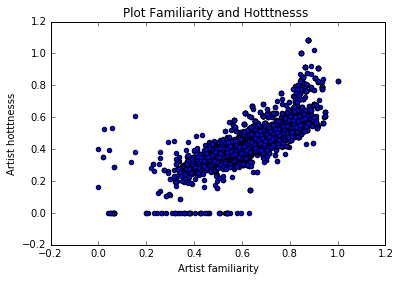

In [28]:
plot1 = songs.plot.scatter(x='artist_familiarity',y='artist_hotttnesss')

plot1.set(title='Plot Familiarity and Hotttnesss ',xlabel="Artist familiarity",ylabel="Artist hotttnesss")

The above plot shows a positive linear association between artist familiarity and hotttnesss 

Now, get summary stats for 2 columns (artist_familiarity, artist_hotttnesss)
list of Stats 
    mean
    median
    variance 
    StD

In [42]:
print songs['artist_familiarity'].mean()
print songs['artist_hotttnesss'].mean()

0.564829523075
0.385552203229


In [43]:
print songs['artist_familiarity'].median()
print songs['artist_hotttnesss'].median()

0.563583586258
0.380742327592


In [45]:
print songs['artist_familiarity'].std()
print songs['artist_hotttnesss'].std()

0.163160451552
0.143647299048


In [46]:
print songs['artist_familiarity'].var()
print songs['artist_hotttnesss'].var()

0.0266213329507
0.0206345465238


Now, create a Plot showing total duration (music time) in mins for each year  (duration in seconds, sum to min)

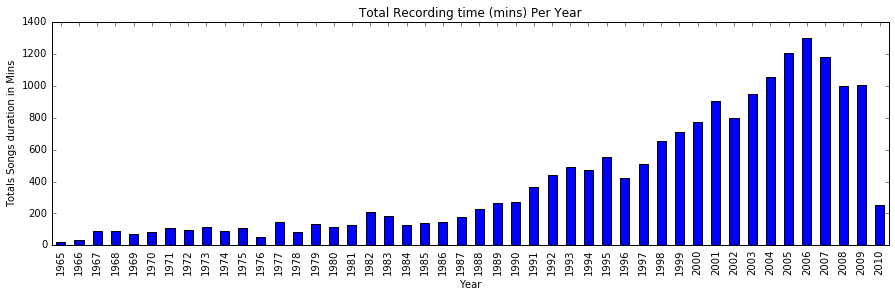

In [77]:
Durations = songs.groupby('year').agg({'duration': sum }).apply(lambda x: x/60)

plot2 = Durations.plot(kind='bar',figsize=(15, 4),legend=None)
plot2.set(title="Total Recording time (mins) Per Year",xlabel="Year",ylabel="Totals Songs duration in Mins")
 